In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from colorama import Fore, Style
from jupyterthemes import jtplot
jtplot.style(context="notebook", theme="monokai", ticks=True)

In [2]:
random_data = np.random.random(size=10000) # generates random number in range [0.0-1.0) of size 10000
data = {"0.0-0.05": 0, 
       "0.05-0.1":0,
       "0.1-0.5":0,
       "0.5-1.0":0}


for i in random_data:
    
    if i <= 0.05:
        data["0.0-0.05"] += 1
    elif i > 0.05 and i <= 0.1:
        data["0.05-0.1"] += 1
        
    elif i > 0.1 and i <= 0.5:
        data["0.1-0.5"] += 1
        
    else:
        data["0.5-1.0"] += 1
        

print(data)

{'0.0-0.05': 549, '0.05-0.1': 487, '0.1-0.5': 4019, '0.5-1.0': 4945}


In [3]:
final_data = {"observations":list(data.keys()), "frequency":list(data.values())}

df = pd.DataFrame(final_data)

df

,observations,frequency
0,0.0-0.05,549
1,0.05-0.1,487
2,0.1-0.5,4019
3,0.5-1.0,4945


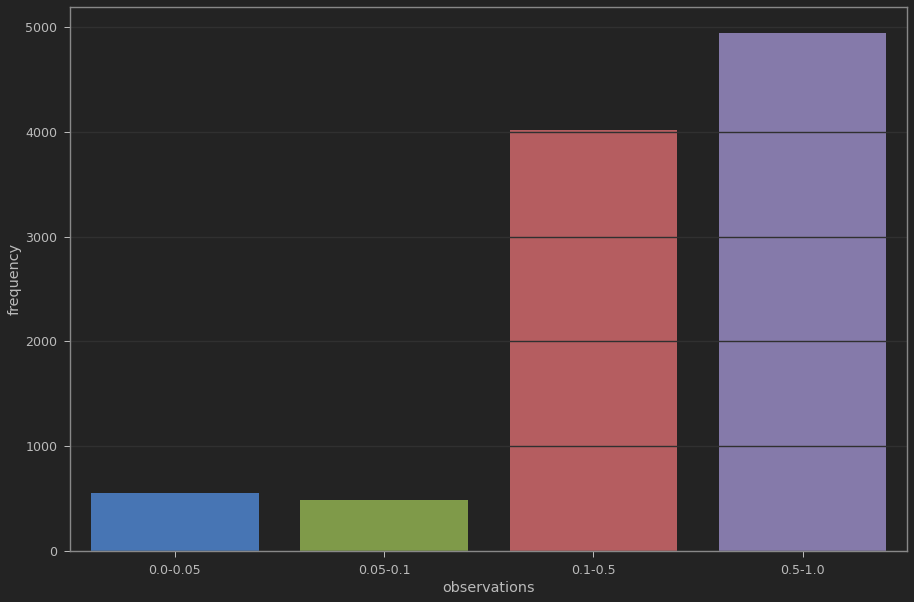

In [8]:
plt.figure(figsize=(15, 10))
sns.barplot(x="observations", y="frequency", data=df)
plt.show()

# Epsilon-Greedy


**IDEA** : Instead of always selecting the greedy procedure i.e., selecting the bandit with maximum win-rate, there should be small probability of selecting something at random (*non-greedy*)

In [9]:
from bandit_class import Bandit

In [29]:
NUM_TRIALS = 10000
WIN_RATES = [0.2, 0.5, 0.75]
EPS = 0.1

## - Greedy Approach 

In [30]:
def greed():
    
    bandits = [Bandit(p) for p in WIN_RATES]
    optimal_bandit = np.argmax([b.p for b in bandits])
    
    print(f"The optimal bandit : {optimal_bandit}")
    
    rewards = np.zeros(NUM_TRIALS)
    
    for i in range(NUM_TRIALS):

        x = bandits[optimal_bandit].pull()
        rewards[i] = x
        bandits[optimal_bandit].update(x)
        
        
    print(f"Total reward obtained : {rewards.sum()}")
    print(f"Overall win rate : {rewards.sum() / NUM_TRIALS}")
    

In [58]:
greed()

The optimal bandit : 2
Total reward obtained : 7497.0
Overall win rate : 0.7497


## - Epsilon-Greedy

In [20]:
def experiment():
    
    bandits = [Bandit(p) for p in WIN_RATES]
    
    optimal_bandit = np.argmax([b.p for b in bandits])
    print(f"The optimal bandit : {optimal_bandit}")
    
    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    
    for i in range(NUM_TRIALS):
        
        if np.random.random() < EPS:
            num_times_explored += 1
            
            j = np.random.randint(len(bandits))
            
            
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])
            
        if j == optimal_bandit:
            num_optimal += 1
            
            
        x = bandits[j].pull()
        rewards[i] = x
        bandits[j].update(x)
            
            
    print(f"Total reward collected : {rewards.sum()}")
    print(f"Overall Win rate : {rewards.sum() / NUM_TRIALS}")
    print(Fore.RED, f"Percentage of times explored : {num_times_explored / NUM_TRIALS * 100}%", Style.RESET_ALL)
    print(Fore.BLUE, f"Percentage of times exploited : {num_times_exploited / NUM_TRIALS * 100}%", Style.RESET_ALL)
    print(Fore.YELLOW, f"Percentage of times optimal bandit was used : {num_optimal / NUM_TRIALS * 100}%", Style.RESET_ALL)
    
    
    # plot the results
    
    cumulative_rewards = np.cumsum(rewards)
    cumulative_win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(cumulative_win_rates, label="win rate obtained by agent")
    plt.xlabel("Epochs")
    plt.ylabel("Cumulative Win-rates")
    plt.plot(np.ones(NUM_TRIALS) * np.max(WIN_RATES), label="optimal bandit win rate")
    plt.legend()
    plt.show()
    

The optimal bandit : 2
Total reward collected : 7231.0
Overall Win rate : 0.7231
 Percentage of times explored : 10.12% 
 Percentage of times exploited : 89.88000000000001% 
 Percentage of times optimal bandit was used : 93.2% 


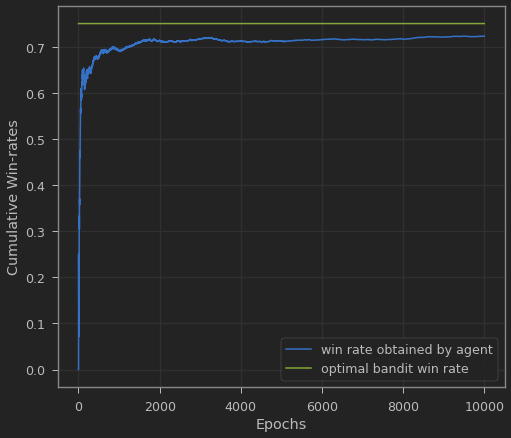

In [22]:
experiment()

# Observation-1 👀:

As we can see that our algorithm converges to the **optimal win-rate** over time.

Now there is a catch to the above code if you noticed the code properly then you can see that I have applied `np.random.random() < EPS` in the if condition, now the question is why?


To solve this mystery let's use the above function but with a reversed if condition i.e. `np.random.random() > EPS`

In [26]:
def experiment2():
    
    bandits = [Bandit(p) for p in WIN_RATES]
    
    optimal_bandit = np.argmax([b.p for b in bandits])
    print(f"The optimal bandit : {optimal_bandit}")
    
    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    
    for i in range(NUM_TRIALS):
        
        if np.random.random() > EPS:
            num_times_explored += 1
            
            j = np.random.randint(len(bandits))
            
            
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])
            
        if j == optimal_bandit:
            num_optimal += 1
            
            
        x = bandits[j].pull()
        rewards[i] = x
        bandits[j].update(x)
            
            
    print(f"Total reward collected : {rewards.sum()}")
    print(f"Overall Win rate : {rewards.sum() / NUM_TRIALS}")
    print(Fore.GREEN, f"Percentage of times explored : {num_times_explored / NUM_TRIALS * 100}%", Style.RESET_ALL)
    print(Fore.MAGENTA, f"Percentage of times exploited : {num_times_exploited / NUM_TRIALS * 100}%", Style.RESET_ALL)
    print(Fore.CYAN, f"Percentage of times optimal bandit was used : {num_optimal / NUM_TRIALS * 100}%", Style.RESET_ALL)
    
    
    # plot the results
    
    cumulative_rewards = np.cumsum(rewards)
    cumulative_win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(cumulative_win_rates, label="win rate obtained by agent")
    plt.xlabel("Epochs")
    plt.ylabel("Cumulative Win-rates")
    plt.plot(np.ones(NUM_TRIALS) * np.max(WIN_RATES), label="optimal bandit win rate")
    plt.legend()
    plt.show()
    

The optimal bandit : 2
Total reward collected : 5110.0
Overall Win rate : 0.511
 Percentage of times explored : 90.13% 
 Percentage of times exploited : 9.87% 
 Percentage of times optimal bandit was used : 39.94% 


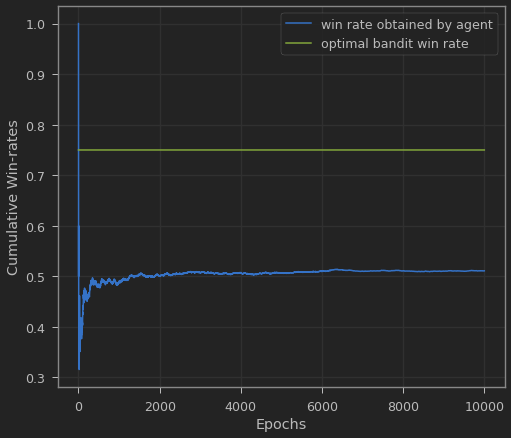

In [27]:
experiment2()

# Observation-2 🔬:

As you can see :

* If the condition `np.random.random() < EPS` is reversed then the algorithm never converges to the **optimal win-rate**. Now why is that?
* It is because more time is spent on exploration rather than exploitation, which can be seen in the above outputs.
* And thereby the selection of optimal bandit is reduced by almost three-fold. 
* The **bar-plot** which is plotted in the first half of the notebook, shows it clearly that the frequency of numbers < 0.1 is pretty less compared to when it is more. Therefore if `np.random.random() < EPS` then more time will be spent in **exploration** rather than **exploitation**.  
* Plus the definition of epsilon-greedy says that a small probability of time should be spent in exploration, and using the reversed we just defy the definition like a boss 😎. 